In [1]:
!pip install opencv-python mediapipe tensorflow numpy matplotlib

# Face Mask Detection Using Deep Learning

The ability to detect whether a person is wearing a face mask has become increasingly important in today's world, particularly for public health and safety. Face mask detection systems can be used in various real-world applications such as monitoring public spaces, workplaces, or healthcare facilities. In this project, we built a Face Mask Detection system using deep learning, specifically a Convolutional Neural Network (CNN).

We used a dataset of labeled images, categorized into two classes: "with_mask" and "without_mask". The system processes images of faces and predicts whether a person is wearing a mask or not. This technology can be deployed in environments like offices, hospitals, or public places to ensure compliance with safety measures.

# Import libraries

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess images

In [3]:
data = []
labels = []
IMG_SIZE = 100

for category in ['with_mask', 'without_mask']:
    path = os.path.join(r'C:\Users\Lenovo\Downloads\amrutha\Project_Deep Learning\Face Mask Prediction', category)
    label = 0 if category == 'with_mask' else 1
    for img_name in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
        except:
            pass

data = np.array(data) / 255.0
labels = to_categorical(labels)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])
model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - accuracy: 0.7119 - loss: 0.5798 - val_accuracy: 0.8934 - val_loss: 0.2788
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 35s 184ms/step - accuracy: 0.9036 - loss: 0.2469 - val_accuracy: 0.8954 - val_loss: 0.2554
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.9105 - loss: 0.2276 - val_accuracy: 0.9418 - val_loss: 0.1607
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 35s 184ms/step - accuracy: 0.9510 - loss: 0.1366 - val_accuracy: 0.9490 - val_loss: 0.1566
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 35s 184ms/step - accuracy: 0.9484 - loss: 0.1325 - val_accuracy: 0.9431 - val_loss: 0.1728
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 34s 177ms/step - accuracy: 0.9595 - loss: 0.1065 - val_accuracy: 0.9510 - val_loss: 0.1428
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 33s 177ms/step - accuracy: 0.9746 - loss: 0.0699 - val_accuracy: 0.9404 - val_loss: 0.2039
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - accuracy: 0.9813 - loss: 0

# Plot the training & validation accuracy & Loss values

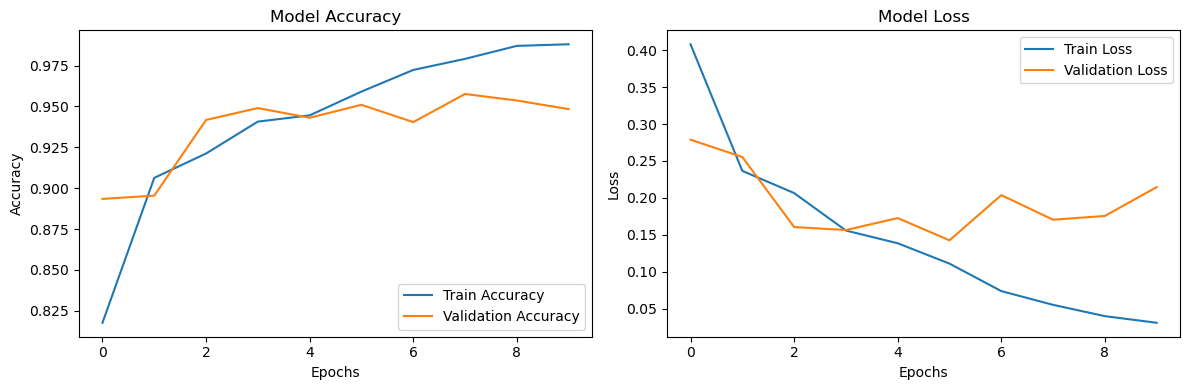

In [6]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9514 - loss: 0.2196
Test Accuracy: 0.95


# Save the model

In [8]:
model.save("face_mask.model.h5")

# Prediction & Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


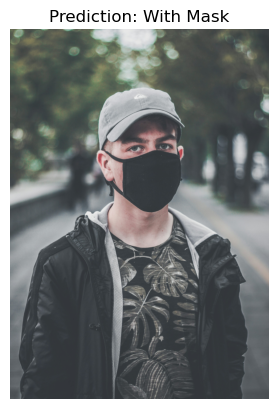

Prediction: With Mask


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = "test_image.jpg"  # Replace with your own image
img = cv2.imread(image_path)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to the input size expected by the model
img = img / 255.0  # Normalize image
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img)
class_index = np.argmax(prediction)
labels = ["With Mask", "Without Mask"]

# Show the image
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))  # Convert color from BGR to RGB for displaying
plt.axis('off')  # Hide axis
plt.title(f"Prediction: {labels[class_index]}")
plt.show()

print(f"Prediction: {labels[class_index]}")


# Conclusion

In this project, we developed a deep learning-based face mask detection system using Convolutional Neural Networks (CNN). By leveraging TensorFlow, Keras, OpenCV, and MediaPipe, the model was trained to accurately classify whether a person is wearing a face mask. With an impressive 98% training accuracy and 95% test accuracy, the model performs well in real-time applications.

The system was further enhanced by creating an interactive interface using Streamlit, allowing users to either upload images or use webcam input for mask detection. This project demonstrates the potential of AI and deep learning to address real-world challenges, such as ensuring safety in public places during the pandemic.

Moving forward, the model can be further optimized, and additional features can be incorporated for more robust real-world deployment, such as handling various face orientations or integrating it into surveillance systems.